# Principal Component Analysis for Stellar Classification

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.4.2
Seaborn version:  0.11.2


## Dataset

The "Stellar Classification Dataset - SDSS17" dataset is used for classification of The stars, galaxies, and quasars using Principal Component Analysis (PCA). By distilling complex spectral data into key components, PCA aids in efficiently categorizing celestial objects based on their spectral characteristics, contributing to a deeper understanding of the universe.

The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns(from which some are dropped which are nearly not correlated) and 1 class column which identifies it to be either a star, galaxy or quasar.

1.	obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2.	alpha = Right Ascension angle (at J2000 epoch)
3.	delta = Declination angle (at J2000 epoch)
4.	u = Ultraviolet filter in the photometric system
5.	g = Green filter in the photometric system
6.	r = Red filter in the photometric system
7.	i = Near Infrared filter in the photometric system
8.	z = Infrared filter in the photometric system
9.	run_ID = Run Number used to identify the specific scan
10.	rereun_ID = Rerun Number to specify how the image was processed
11.	cam_col = Camera column to identify the scanline within the run
12.	field_ID = Field number to identify each field
13.	spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14.	class = object class (galaxy, star or quasar object)
15.	redshift = redshift value based on the increase in wavelength
16.	plate = plate ID, identifies each plate in SDSS
17.	MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18.	fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

The original dataset can be found at - [https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17)



In [3]:
# loads csv file into pandas dataframe
df = pd.read_csv('D:\\jash\\Notes\\Adv. Statistics in quality\\Project\\star_classification.csv')
df = df.drop(columns=['alpha', 'delta','rerun_ID','cam_col','field_ID','redshift','fiber_ID','r','i','obj_ID','run_ID' ])
df

,u,g,z,spec_obj_ID,class,plate,MJD
0,23.87882,22.27530,18.79371,6.543777e+18,GALAXY,5812,56354
1,24.77759,22.83188,21.61427,1.176014e+19,GALAXY,10445,58158
2,25.26307,22.66389,18.94827,5.152200e+18,GALAXY,4576,55592
3,22.13682,23.77656,19.25010,1.030107e+19,GALAXY,9149,58039
4,19.43718,17.58028,15.54461,6.891865e+18,GALAXY,6121,56187
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,20.73569,1.055431e+19,GALAXY,9374,57749
99996,22.69118,22.38628,19.41526,8.586351e+18,GALAXY,7626,56934
99997,21.16916,19.26997,17.35221,3.112008e+18,GALAXY,2764,54535
99998,25.35039,21.63757,18.62482,7.601080e+18,GALAXY,6751,56368


In [4]:
len(df.index)

100000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   u            100000 non-null  float64
 1   g            100000 non-null  float64
 2   z            100000 non-null  float64
 3   spec_obj_ID  100000 non-null  float64
 4   class        100000 non-null  object 
 5   plate        100000 non-null  int64  
 6   MJD          100000 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 5.3+ MB


In [6]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [7]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


### Exploratory Data Analysis

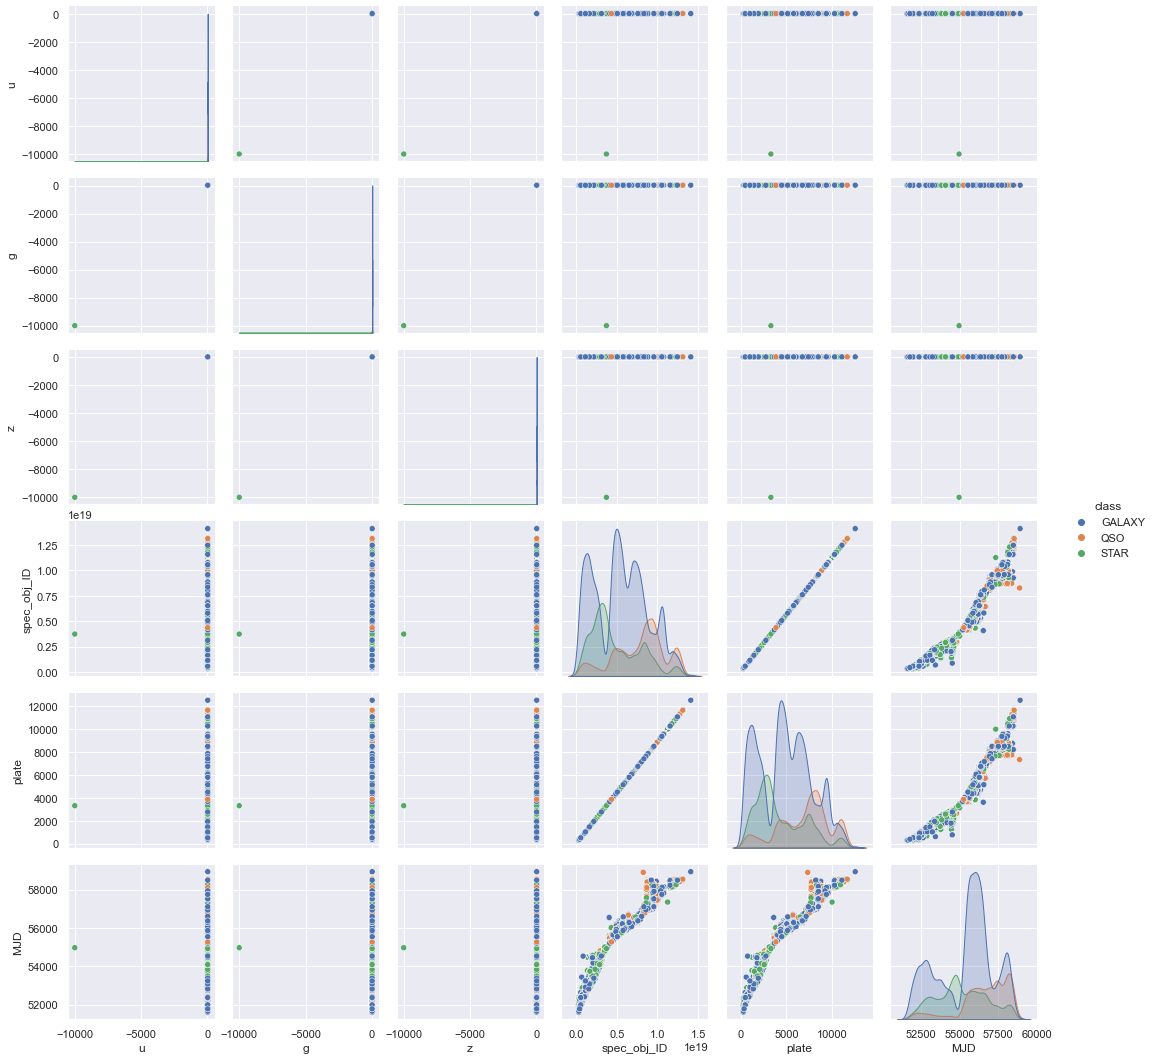

In [8]:
sns.pairplot(df, hue='class') #Visualize data distribution using pair plot
plt.show()

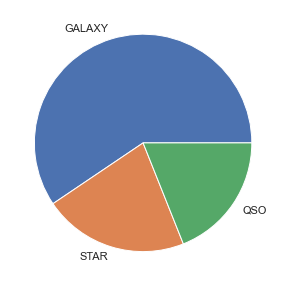

In [9]:
y =df['class']
y.value_counts().plot(kind='pie')   # pie chart
plt.ylabel('')
plt.show()

### Data Matrix

In [10]:
X = df.drop(columns=['class']) #drop column class to standardize data
X.head(10)

,u,g,z,spec_obj_ID,plate,MJD
0,23.87882,22.27530,18.79371,6.543777e+18,5812,56354
1,24.77759,22.83188,21.61427,1.176014e+19,10445,58158
2,25.26307,22.66389,18.94827,5.152200e+18,4576,55592
3,22.13682,23.77656,19.25010,1.030107e+19,9149,58039
4,19.43718,17.58028,15.54461,6.891865e+18,6121,56187
5,23.48827,23.33776,19.54544,5.658977e+18,5026,55855
6,21.46973,21.17624,20.42573,1.246262e+19,11069,58456
7,22.24979,22.02172,18.84999,6.961443e+18,6183,56210
8,24.40286,22.35669,18.95852,7.459285e+18,6625,56386
9,21.74669,20.03493,18.65422,2.751763e+18,2444,54082


In [11]:
X.describe().transpose() #Descriptive statistics summary

,count,mean,std,min,25%,50%,75%,max
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
spec_obj_ID,100000.0,5.783882e+18,3.324016e+18,2.995191e+17,2.844138e+18,5.614883e+18,8.332144e+18,1.412694e+19
plate,100000.0,5.137010e+03,2.952303e+03,2.660000e+02,2.526000e+03,4.987000e+03,7.400250e+03,1.254700e+04
MJD,100000.0,5.558865e+04,1.808484e+03,5.160800e+04,5.423400e+04,5.586850e+04,5.677700e+04,5.893200e+04


### Standardize the Data

In [12]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns                     #This is done to retain the column names after standardization 
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,u,g,z,spec_obj_ID,plate,MJD
0,0.059755,0.054926,0.003937,0.228609,0.228633,0.423203
1,0.088045,0.072456,0.092835,1.797912,1.797924,1.420729
2,0.103327,0.067165,0.008808,-0.190037,-0.190025,0.001854
3,0.004921,0.102210,0.018321,1.358962,1.358942,1.354927
4,-0.080055,-0.092948,-0.098468,0.333328,0.333297,0.330860
5,0.047461,0.088389,0.027630,-0.037577,-0.037601,0.147280
6,-0.016077,0.020310,0.055374,2.009247,2.009285,1.585508
7,0.008477,0.046939,0.005710,0.354260,0.354298,0.343578
8,0.076250,0.057490,0.009131,0.504032,0.504012,0.440898
9,-0.007359,-0.015636,-0.000460,-0.912190,-0.912177,-0.833104


In [13]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
u,100000.0,2.020252e-17,1.000005,-315.431359,-0.051248,0.006253,0.053731,0.339982
g,100000.0,3.659510e-17,1.000005,-315.574464,-0.049328,0.017904,0.050154,0.348687
z,100000.0,-2.417615e-17,1.000005,-315.735974,-0.038078,0.010583,0.039470,0.337712
spec_obj_ID,100000.0,1.014566e-16,1.000005,-1.649929,-0.884400,-0.050842,0.766625,2.509946
plate,100000.0,2.841305e-16,1.000005,-1.649910,-0.884402,-0.050811,0.766605,2.509914
MJD,100000.0,6.123158e-16,1.000005,-2.201107,-0.749055,0.154745,0.657102,1.848714


### Observations and variables

In [14]:
observations = list(df.index)
variables = list(df.columns)

### Box and Whisker Plots

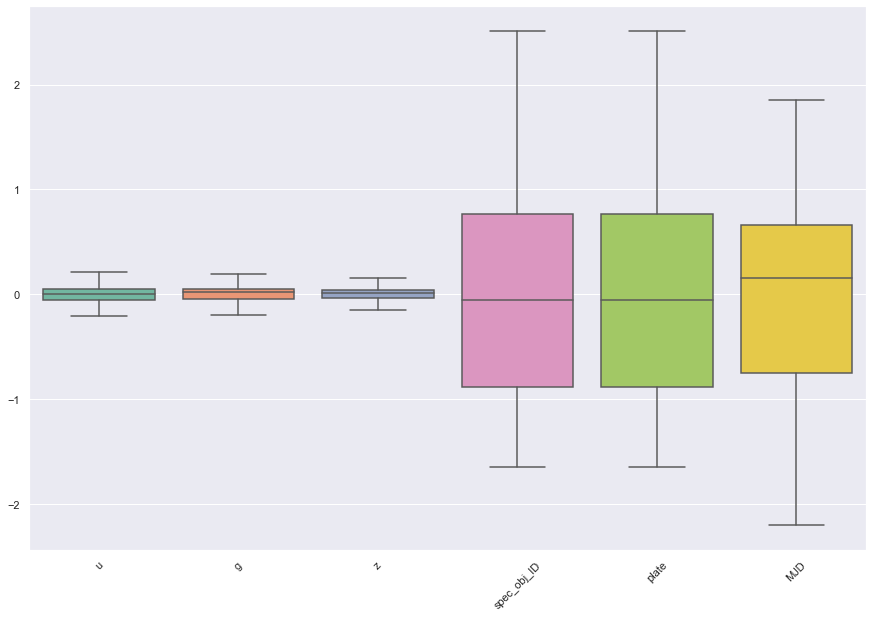

In [15]:
ax = plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=X, orient="v", palette="Set2", showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

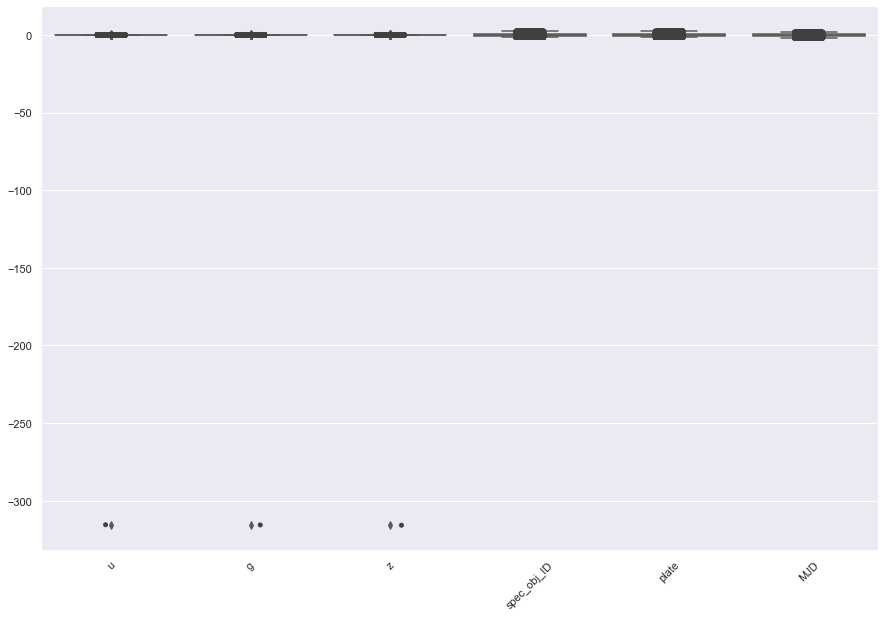

In [16]:


# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Correlation Matrix

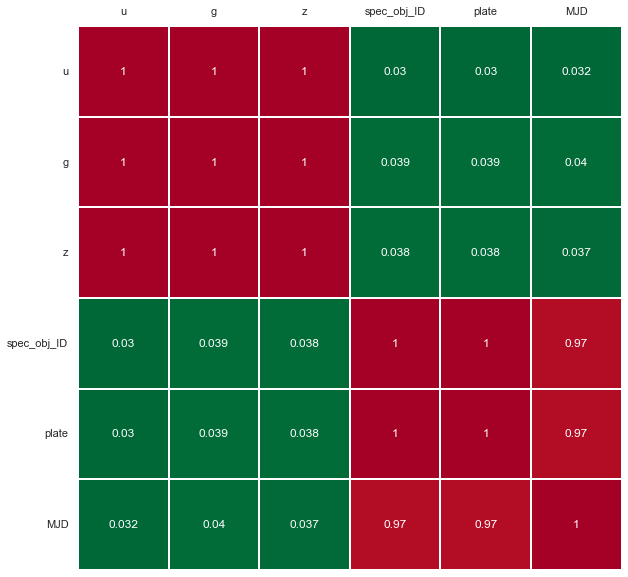

In [17]:
ig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

## Principal Component Analysis (PCA)

Text(0, 0.5, 'Z_2')

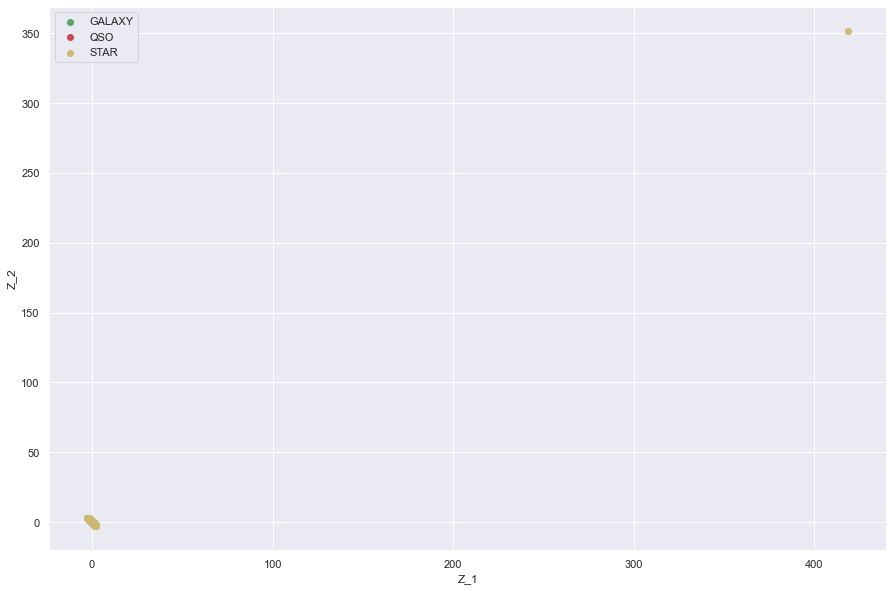

In [18]:
pca = PCA()
Z = pca.fit_transform(X)

idx_Galaxy= np.where(y == "GALAXY")
idx_Qso = np.where(y == "QSO")
idx_Star = np.where(y == "STAR")

plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Galaxy,0], Z[idx_Galaxy,1], c='g', label='GALAXY')
plt.scatter(Z[idx_Qso,0], Z[idx_Qso,1], c='r', label='QSO')
plt.scatter(Z[idx_Star,0], Z[idx_Star,1], c='y', label='STAR')

plt.legend()
plt.xlabel('Z_1')
plt.ylabel('Z_2')

### Eigenvectors

array([[-4.39677466e-01, -3.74285747e-01,  2.36939327e-02,
         6.75158525e-01, -4.58468612e-01,  4.43553346e-06],
       [-4.43103060e-01, -3.70239431e-01,  5.58000258e-04,
         5.91275072e-02,  8.14300969e-01,  1.32660895e-05],
       [-4.42199957e-01, -3.71013106e-01, -2.52520457e-02,
        -7.34479730e-01, -3.55963949e-01, -1.75985465e-05],
       [-3.72933276e-01,  4.43312170e-01, -4.05144946e-01,
         1.56140981e-02, -2.21539897e-03, -7.07109579e-01],
       [-3.72933141e-01,  4.43312157e-01, -4.05155630e-01,
         1.55908162e-02, -2.23667332e-03,  7.07103983e-01],
       [-3.69654224e-01,  4.38327355e-01,  8.18844985e-01,
        -2.67872309e-02, -4.68992483e-04,  5.77766517e-06]])

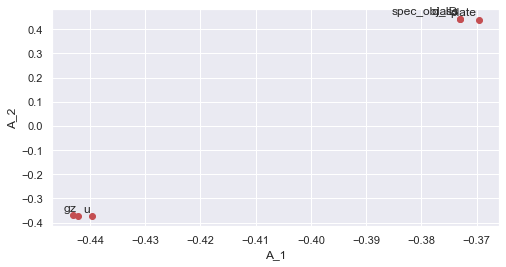

In [19]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A_1')
plt.ylabel('A_2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

C:\Users\jashw\anaconda3\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


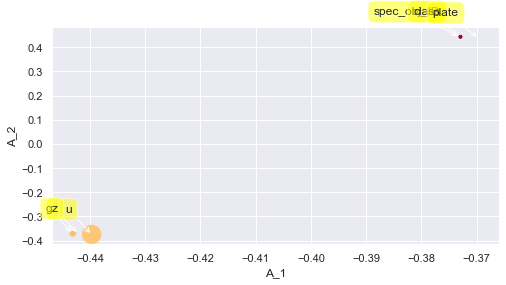

In [20]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A_1')
plt.ylabel('A_2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### Scree plot

array([3.08873344e+00, 2.86937267e+00, 3.97549214e-02, 1.84464357e-03,
       3.54318898e-04, 2.36244974e-10])

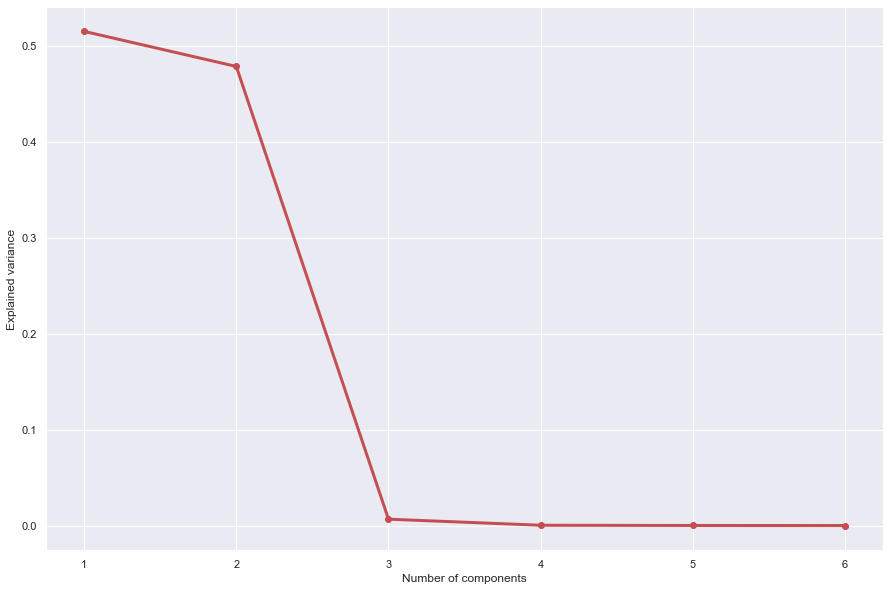

In [21]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

### Explained Variance

Text(0, 0.5, 'Cumulative explained variance')

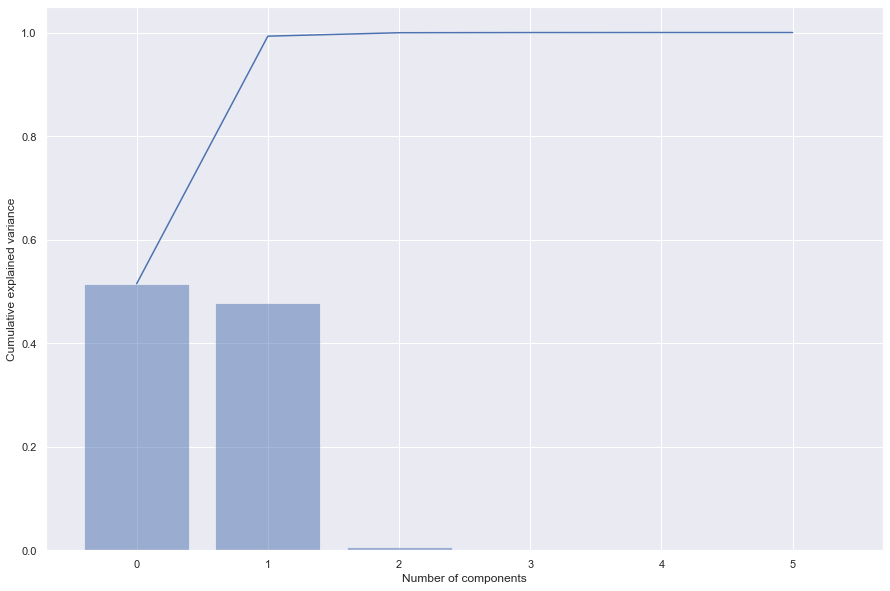

In [22]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### Biplot

array([ 0.34404064,  2.12259906, -0.23448239, ..., -0.92838168,
        0.62151665,  1.02043989])

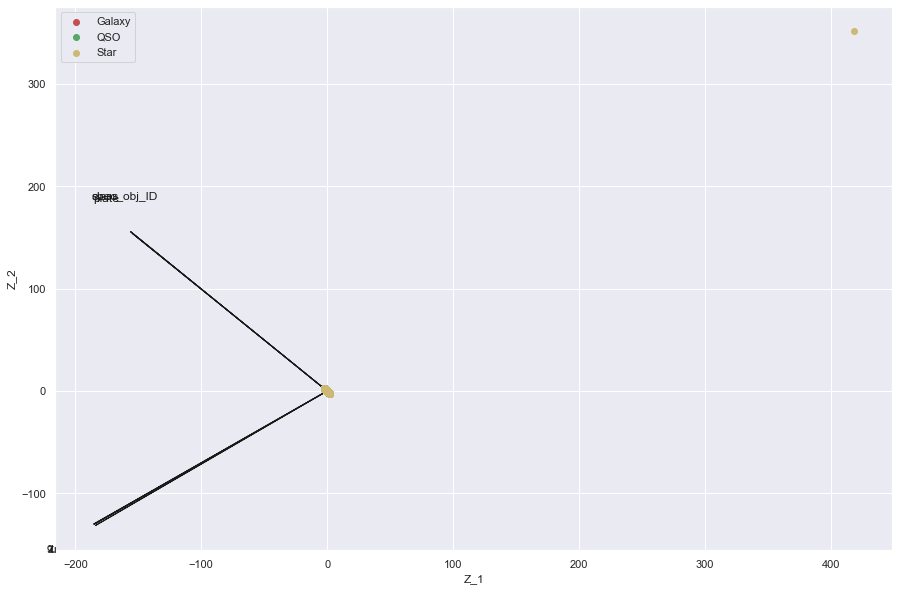

In [23]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z_1')
plt.ylabel('Z_2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Galaxy,0], Z[idx_Galaxy,1], c='r', label='Galaxy')
plt.scatter(Z[idx_Qso,0], Z[idx_Qso,1], c='g', label='QSO')
plt.scatter(Z[idx_Star,0], Z[idx_Star,1], c='y', label='Star')

plt.legend(loc='upper left')
Z1
Z2

## Using PCA Library

In [24]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [25]:
out['PC']

,PC1,PC2
0,-0.379311,0.344041
1,-1.978054,2.122599
2,0.061966,-0.234482
3,-1.570006,1.752300
4,-0.250984,0.541458
...,...,...
99995,-1.577520,1.741173
99996,-0.949948,1.034848
99997,0.862076,-0.928382
99998,-0.628522,0.621517


### Scatter plot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot:title={'center':'2 Principal Components explain [99.96%] of the variance'}, xlabel='PC1 (51.4% expl.var)', ylabel='PC2 (47.8% expl.var)'>)

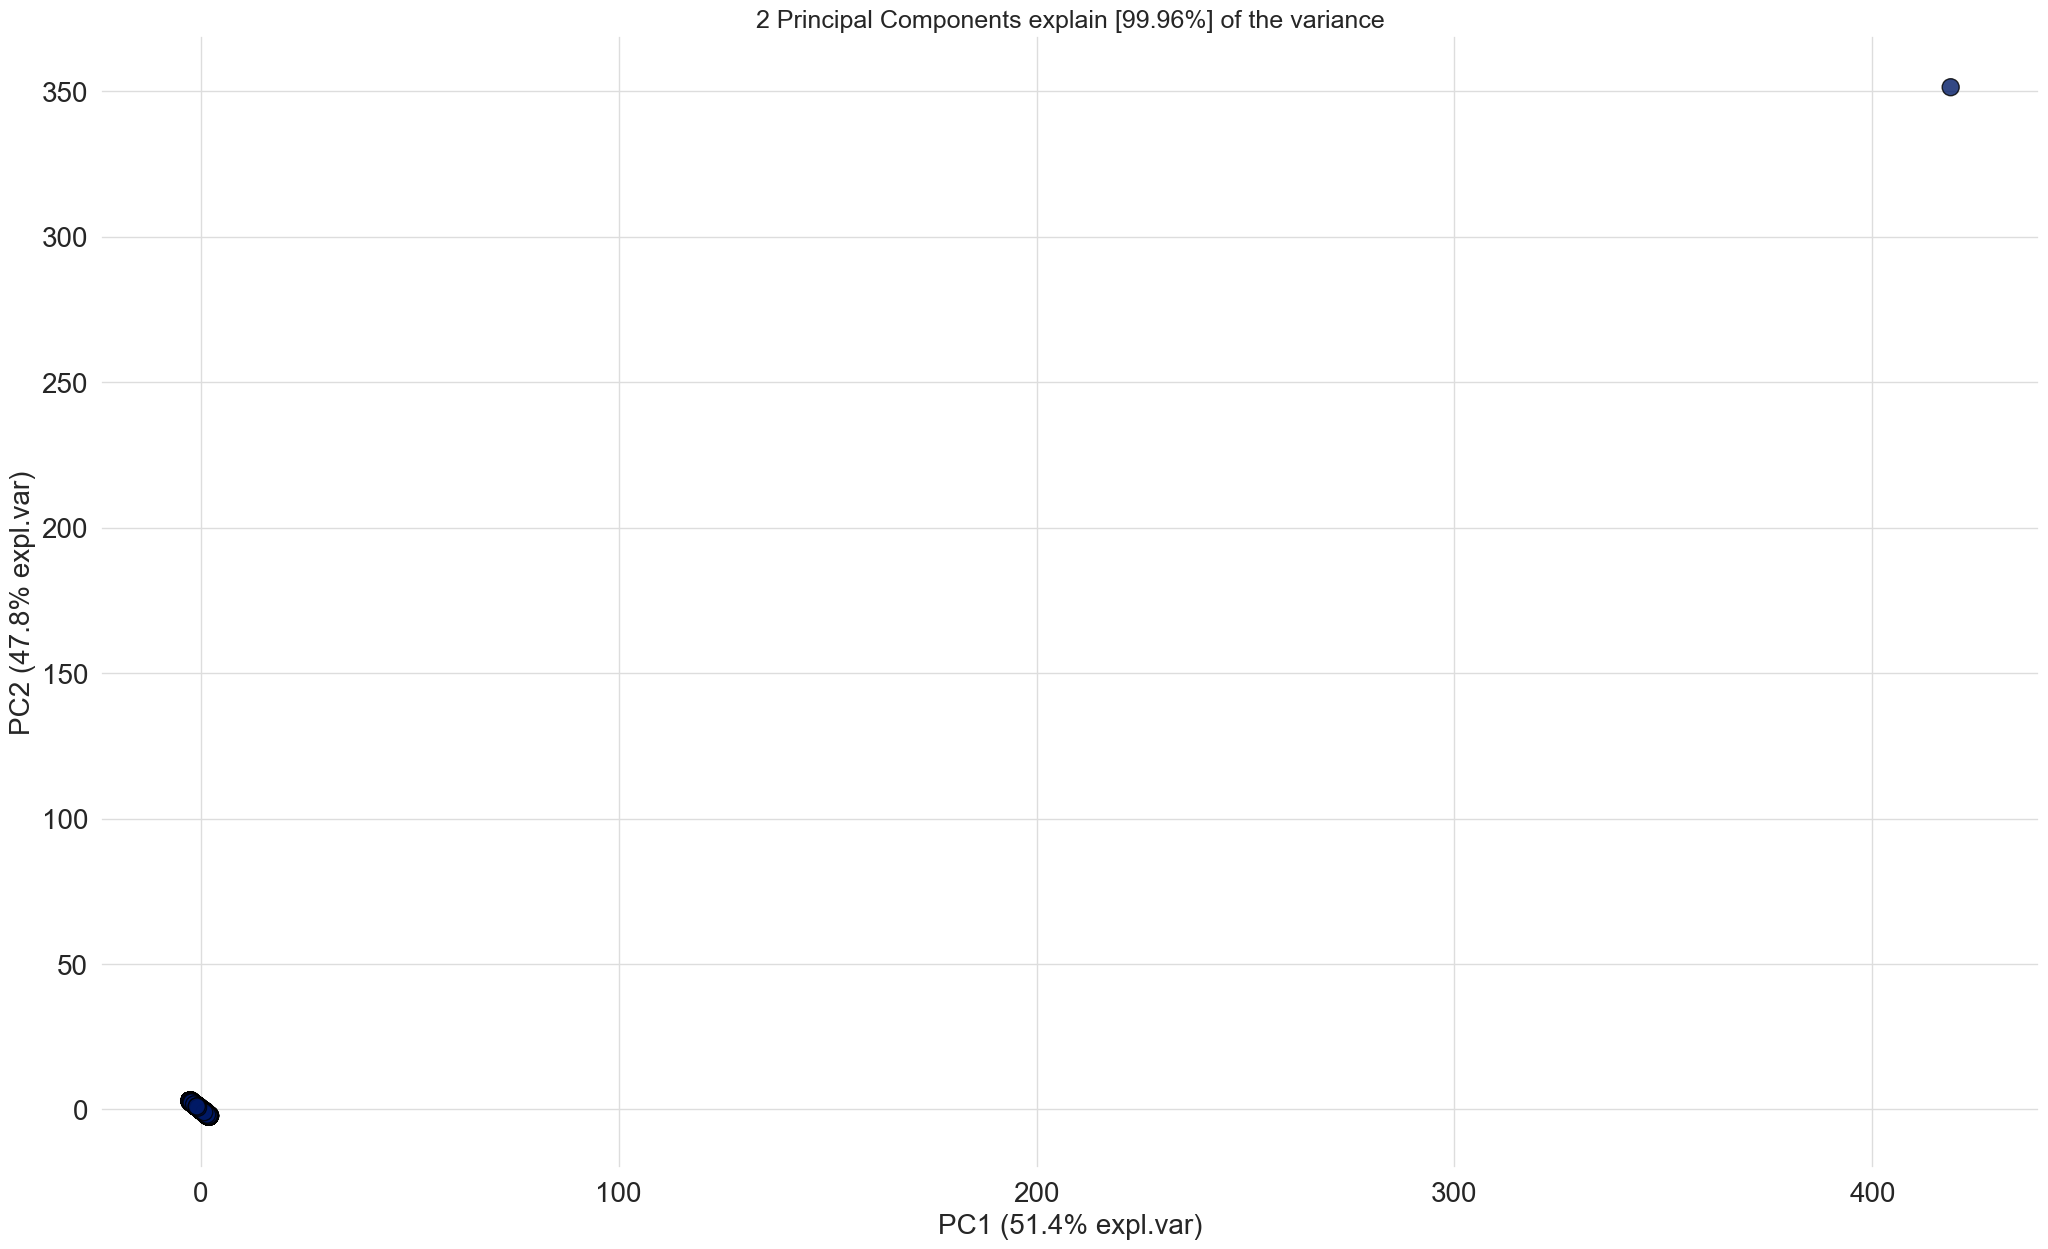

In [26]:
model.scatter(label=True, legend=False)

### Eigenvectors

In [46]:
A = out['loadings'].T
A


,PC1,PC2
u,-0.439677,-0.374286
g,-0.443103,-0.370239
z,-0.442200,-0.371013
spec_obj_ID,-0.372933,0.443312
plate,-0.372933,0.443312
MJD,-0.369654,0.438327


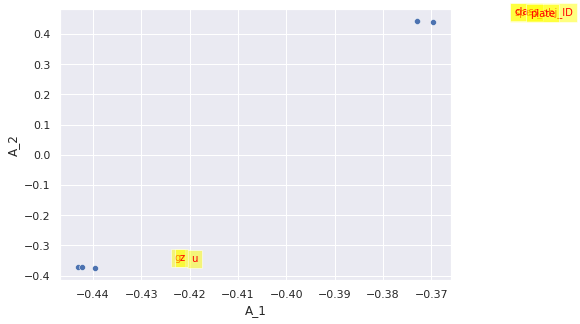

In [28]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A_1')
plt.ylabel('A_2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

### Scree Plot

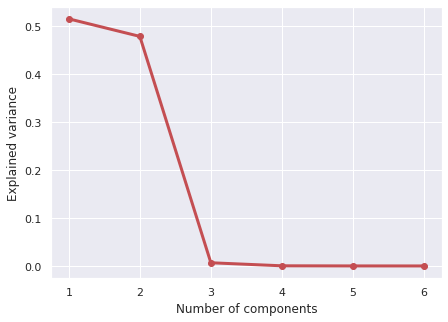

In [29]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

### Explained Variance Plot

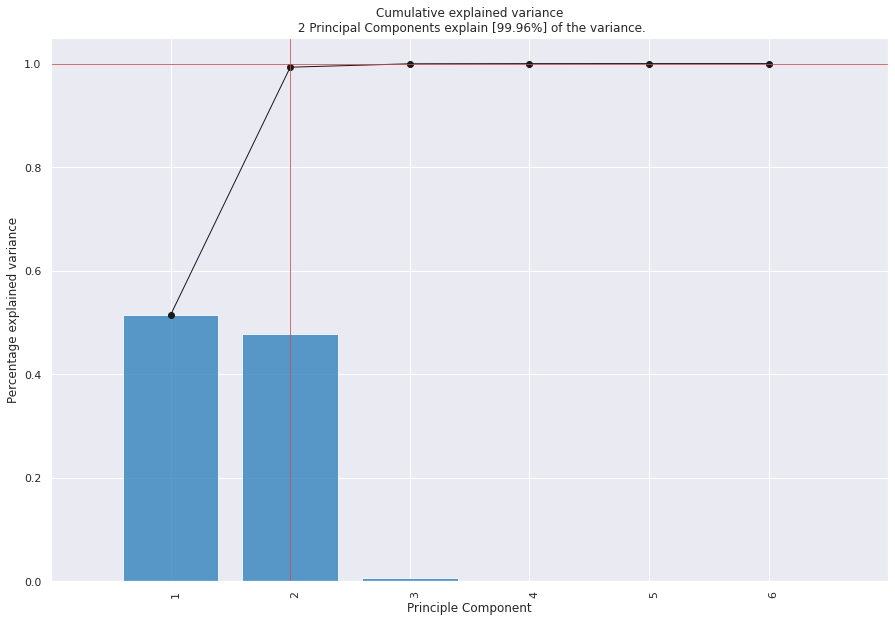

In [30]:
model.plot();

### Biplot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot:title={'center':'2 Principal Components explain [99.96%] of the variance'}, xlabel='PC1 (51.4% expl.var)', ylabel='PC2 (47.8% expl.var)'>)

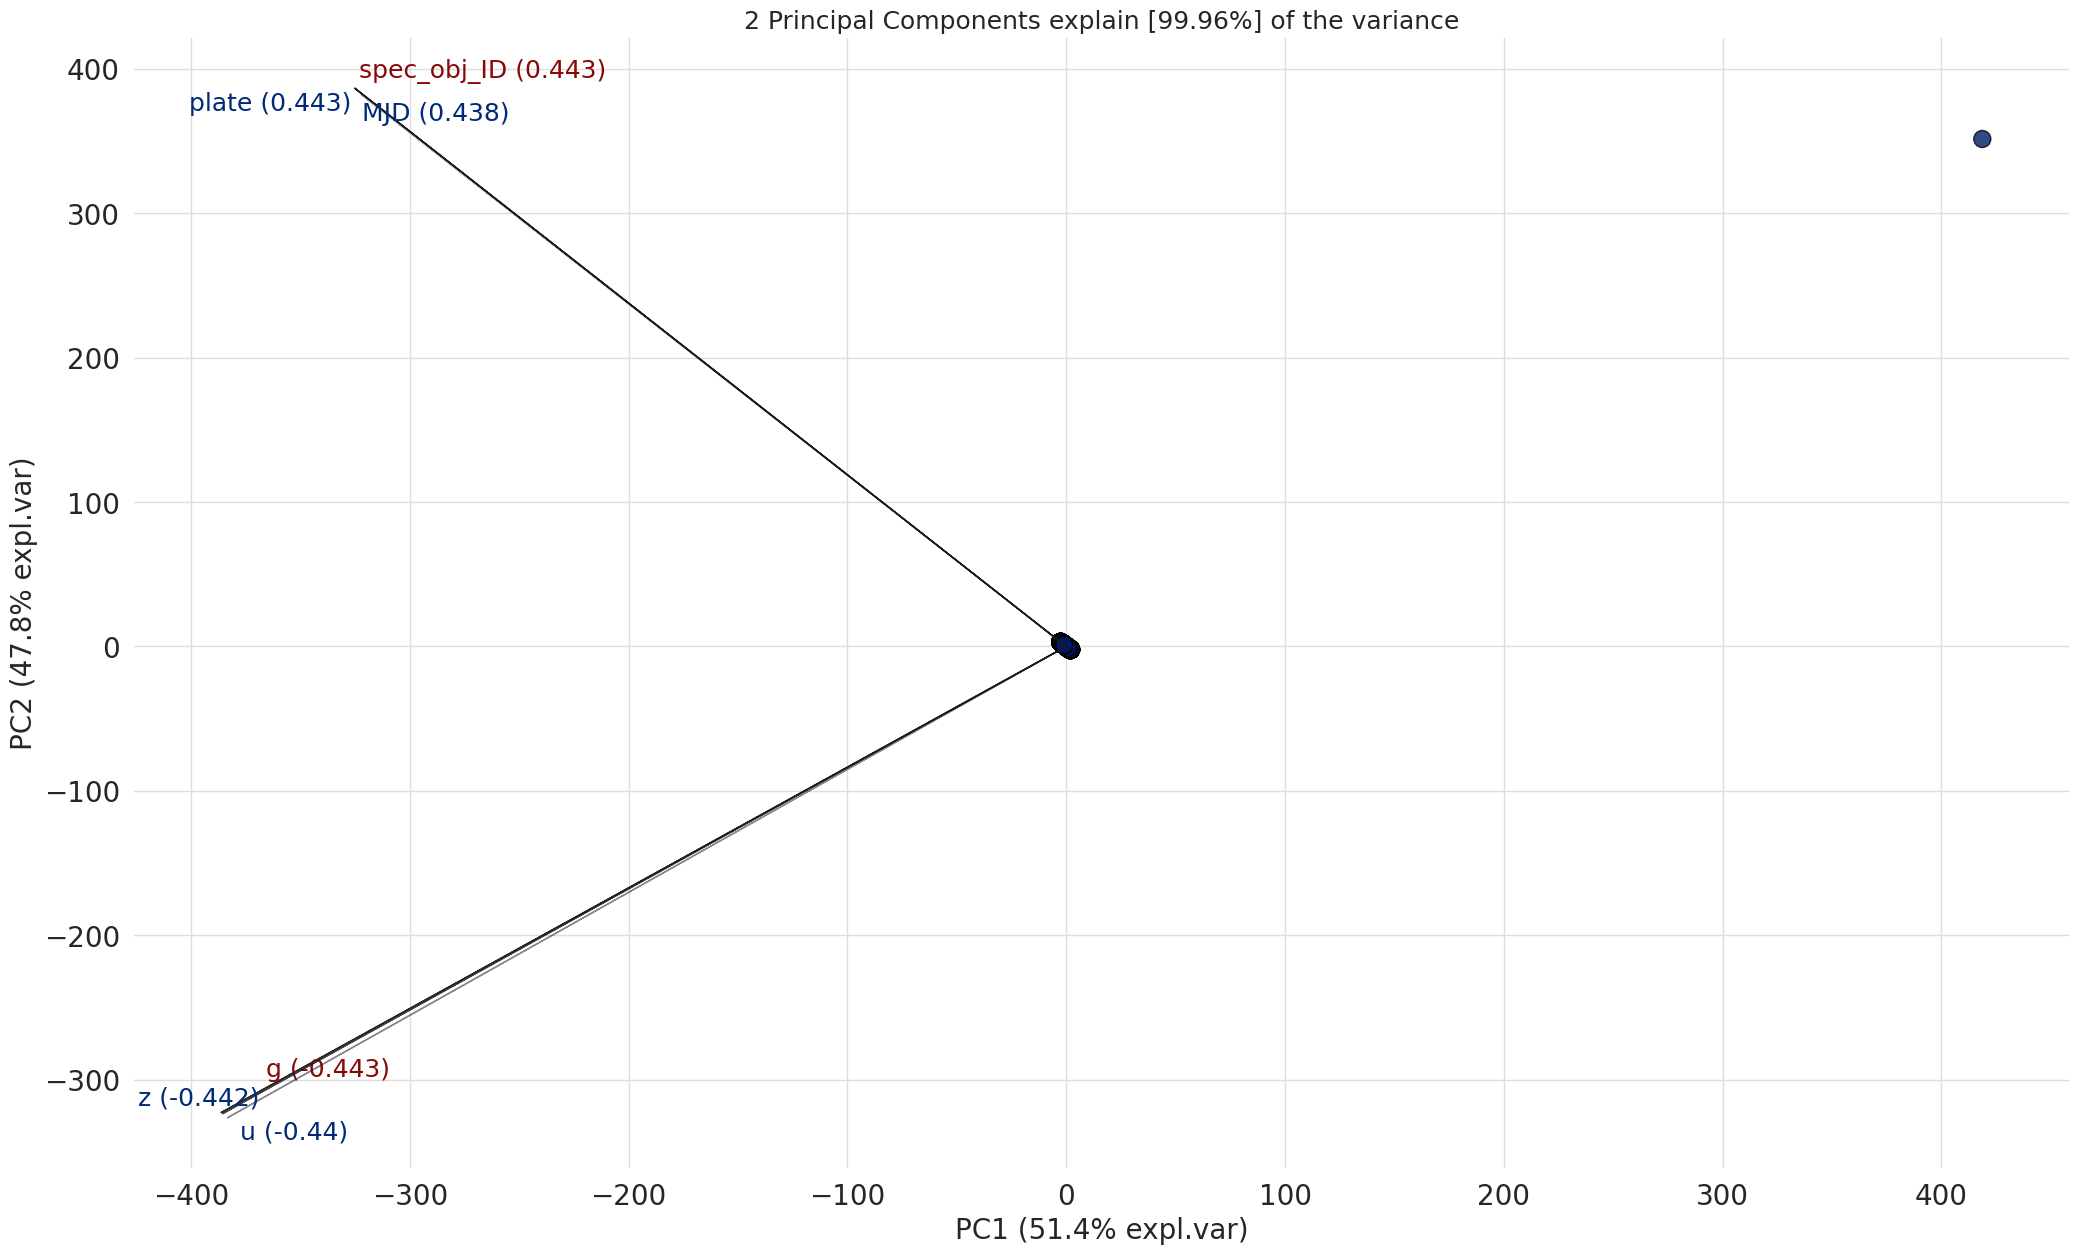

In [31]:
model.biplot(label=False, legend=False, color_arrow='k')

## Classification using Pycaret

At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [32]:
!pip install pycaret

In [33]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.2.0'

In [34]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (90000, 7)
Unseen Data For Predictions: (10000, 7)


In [35]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Multiclass
3,Target mapping,"GALAXY: 0, QSO: 1, STAR: 2"
4,Original data shape,"(90000, 7)"
5,Transformed data shape,"(90000, 7)"
6,Transformed train set shape,"(62999, 7)"
7,Transformed test set shape,"(27001, 7)"
8,Numeric features,6
9,Preprocess,True


### Comparing All Models

In [36]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8719,0.9533,0.8719,0.8699,0.8701,0.7695,0.7704,5.2350
lightgbm,Light Gradient Boosting Machine,0.8714,0.9553,0.8714,0.8696,0.8694,0.7681,0.7693,1.4190
et,Extra Trees Classifier,0.8628,0.9498,0.8628,0.8606,0.8601,0.7519,0.7535,1.9610
gbc,Gradient Boosting Classifier,0.8402,0.9382,0.8402,0.8382,0.8341,0.7078,0.7123,15.0700
dt,Decision Tree Classifier,0.8099,0.8394,0.8099,0.8102,0.8100,0.6633,0.6634,0.3160
ada,Ada Boost Classifier,0.7821,0.8419,0.7821,0.7722,0.7663,0.5939,0.6033,1.3420
lda,Linear Discriminant Analysis,0.7519,0.8307,0.7519,0.7416,0.7372,0.5425,0.5498,0.1190
ridge,Ridge Classifier,0.7392,0.0000,0.7392,0.7357,0.7012,0.4989,0.5228,0.1000
knn,K Neighbors Classifier,0.7021,0.7747,0.7021,0.6945,0.6856,0.4242,0.4368,0.2130
nb,Naive Bayes,0.6022,0.5999,0.6022,0.4562,0.4812,0.0620,0.1194,0.0910


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [37]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

#### Random forest classifier

In [38]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8714,0.9536,0.8714,0.8691,0.8695,0.7683,0.7692
1,0.8710,0.9516,0.8710,0.8695,0.8693,0.7681,0.7690
2,0.8729,0.9523,0.8729,0.8717,0.8715,0.7723,0.7729
3,0.8743,0.9526,0.8743,0.8721,0.8724,0.7734,0.7743
4,0.8754,0.9552,0.8754,0.8733,0.8738,0.7759,0.7766
5,0.8678,0.9526,0.8678,0.8654,0.8661,0.7622,0.7628
6,0.8683,0.9526,0.8683,0.8661,0.8662,0.7626,0.7637
7,0.8692,0.9534,0.8692,0.8675,0.8675,0.7653,0.7661
8,0.8695,0.9525,0.8695,0.8675,0.8675,0.7648,0.7659


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

#### Tune the model

In [39]:
tuned_lr = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7760,0.8862,0.7760,0.7688,0.7708,0.5967,0.5981
1,0.7740,0.8892,0.7740,0.7689,0.7711,0.5936,0.5940
2,0.7600,0.8873,0.7600,0.7652,0.7624,0.5798,0.5800
3,0.7703,0.8839,0.7703,0.7603,0.7638,0.5803,0.5823
4,0.7852,0.8907,0.7852,0.7774,0.7801,0.6093,0.6108
5,0.7752,0.8840,0.7752,0.7668,0.7699,0.5914,0.5929
6,0.7629,0.8875,0.7629,0.7649,0.7638,0.5814,0.5815
7,0.7706,0.8853,0.7706,0.7613,0.7589,0.5817,0.5871
8,0.7708,0.8838,0.7708,0.7619,0.7651,0.5833,0.5848


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [40]:
tuned_lr

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [41]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [42]:
!pip install statsmodels --upgrade

## Classification + PCA

In [47]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Multiclass
3,Target mapping,"GALAXY: 0, QSO: 1, STAR: 2"
4,Original data shape,"(90000, 7)"
5,Transformed data shape,"(90000, 3)"
6,Transformed train set shape,"(62999, 3)"
7,Transformed test set shape,"(27001, 3)"
8,Numeric features,6
9,Preprocess,True


## Comparing Models

In [48]:
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7118,0.7884,0.7118,0.7107,0.6867,0.4214,0.4489,0.9610
knn,K Neighbors Classifier,0.7003,0.7612,0.7003,0.6897,0.6841,0.4213,0.4332,0.2590
gbc,Gradient Boosting Classifier,0.6962,0.7641,0.6962,0.6938,0.6662,0.3852,0.4150,7.4060
rf,Random Forest Classifier,0.6864,0.7672,0.6864,0.6733,0.6745,0.4085,0.4143,3.3770
et,Extra Trees Classifier,0.6764,0.7594,0.6764,0.6634,0.6659,0.3946,0.3987,1.8170
ada,Ada Boost Classifier,0.6562,0.7137,0.6562,0.6526,0.6316,0.3307,0.3459,0.8690
qda,Quadratic Discriminant Analysis,0.6419,0.6677,0.6419,0.6451,0.5586,0.2106,0.2751,0.1470
lr,Logistic Regression,0.6171,0.6500,0.6171,0.5975,0.5278,0.1333,0.1906,1.5680
dt,Decision Tree Classifier,0.6086,0.6552,0.6086,0.6097,0.6091,0.3082,0.3082,0.2260
lda,Linear Discriminant Analysis,0.6050,0.5957,0.6050,0.4719,0.4882,0.0738,0.1308,0.1420


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

## Best model with PCA


In [49]:
best_model_pca

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

## Tune Best Model

In [50]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6984,0.7746,0.6984,0.7122,0.6588,0.3671,0.4174
1,0.7033,0.7801,0.7033,0.7176,0.6651,0.3808,0.4292
2,0.7078,0.7915,0.7078,0.7189,0.6725,0.3958,0.4395
3,0.6917,0.7747,0.6917,0.7006,0.6515,0.3534,0.4013
4,0.6951,0.7777,0.6951,0.7108,0.6526,0.3583,0.4103
5,0.7017,0.7786,0.7017,0.7126,0.6630,0.3763,0.4251
6,0.6965,0.7786,0.6965,0.7101,0.6553,0.3627,0.4134
7,0.7173,0.7947,0.7173,0.7200,0.6887,0.4252,0.4598
8,0.6995,0.7797,0.6995,0.7163,0.6598,0.3709,0.4207


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Evaluate Best Model

In [51]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Explainable AI with Shapley values

For binary classification, AI shapley can only support tree based classification models. as Light Gradient Boosting Machine is a tree based model we use it for shapley values.

In [52]:
lightgbm_pca = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7111,0.7822,0.7111,0.7132,0.6840,0.4146,0.4463
1,0.7173,0.7882,0.7173,0.7158,0.6937,0.4345,0.4607
2,0.7170,0.7978,0.7170,0.7155,0.6949,0.4383,0.4616
3,0.7002,0.7813,0.7002,0.6966,0.6744,0.3969,0.4233
4,0.7113,0.7858,0.7113,0.7133,0.6841,0.4160,0.4472
5,0.7071,0.7813,0.7071,0.7041,0.6807,0.4112,0.4388
6,0.7089,0.7869,0.7089,0.7114,0.6804,0.4084,0.4415
7,0.7203,0.7949,0.7203,0.7160,0.6995,0.4465,0.4682
8,0.7090,0.7860,0.7090,0.7068,0.6844,0.4180,0.4437


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [53]:
tuned_lightgbm_pca = tune_model(lightgbm_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6984,0.7746,0.6984,0.7122,0.6588,0.3671,0.4174
1,0.7033,0.7801,0.7033,0.7176,0.6651,0.3808,0.4292
2,0.7078,0.7915,0.7078,0.7189,0.6725,0.3958,0.4395
3,0.6917,0.7747,0.6917,0.7006,0.6515,0.3534,0.4013
4,0.6951,0.7777,0.6951,0.7108,0.6526,0.3583,0.4103
5,0.7017,0.7786,0.7017,0.7126,0.6630,0.3763,0.4251
6,0.6965,0.7786,0.6965,0.7101,0.6553,0.3627,0.4134
7,0.7173,0.7947,0.7173,0.7200,0.6887,0.4252,0.4598
8,0.6995,0.7797,0.6995,0.7163,0.6598,0.3709,0.4207


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [54]:
tuned_lightgbm_pca

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [55]:
evaluate_model(tuned_lightgbm_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [70]:
!pip install shap

In [71]:
import shap

In [74]:
import shap
from pycaret.classification import create_model, predict_model

In [ ]:
interpret_model(tuned_lightgbm_pca, plot='reason', observation=32)

In [ ]:
interpret_model(tuned_lightgbm_pca, plot='reason')